# Diabetes Prediction Model

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# importing dataset
data = pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Here, we can see the min. value of column Glucose, BloodPressure, SkinThickness, Insulin, BMI(Body mass index[weight in kg/(height in m.)^2]) is 0. They cannot be 0

# 

## Replacing 0 by mean 

In [8]:
for i in data.iloc[:,1:6].columns:
    data[i] = data[i].replace(0,data[i].mean())
    

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Checking null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


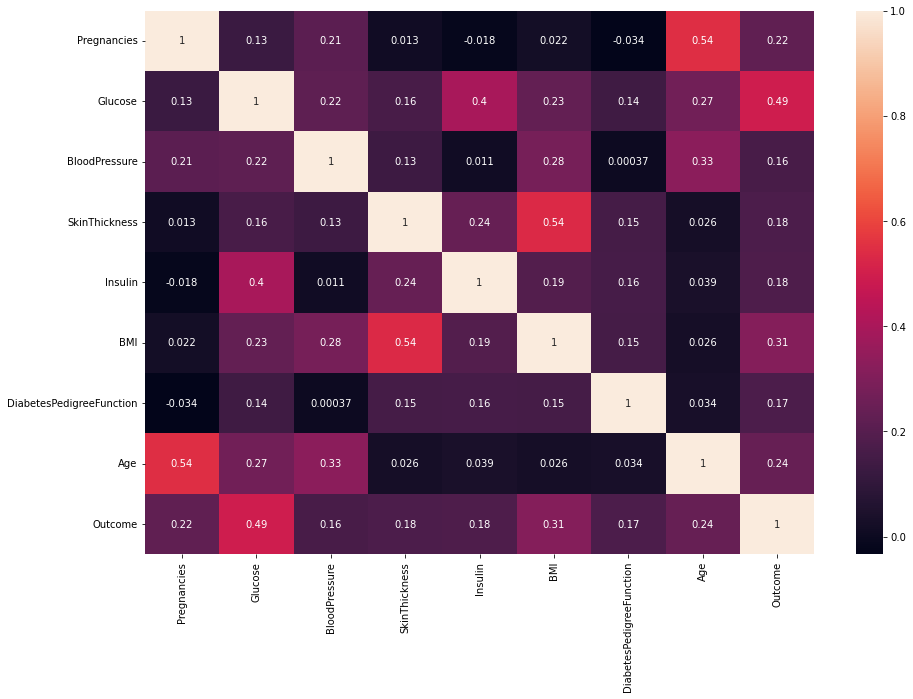

In [12]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),annot = True);

#  Features are not highly co-related

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

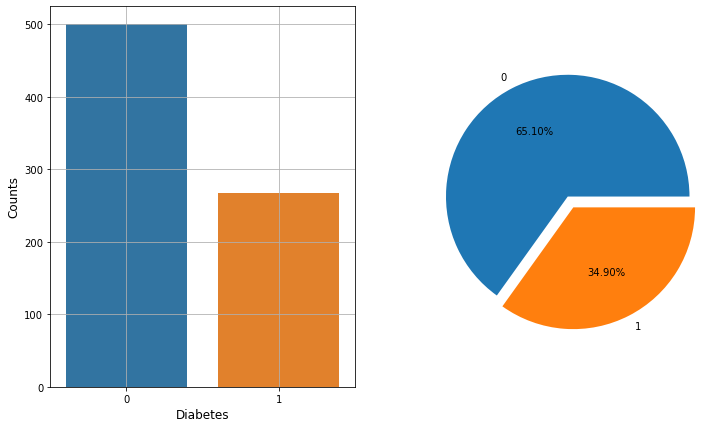

In [15]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
sns.barplot(x = [0,1],y = data["Outcome"].value_counts())
plt.xlabel("Diabetes",fontsize = 12)
plt.ylabel("Counts",fontsize = 12)
plt.grid()
plt.subplot(1,2,2)
plt.pie(data["Outcome"].value_counts(),labels = [0,1],explode = [0,0.1],autopct="%.2f%%")
plt.show()


## Observation:- 65% of populations have not been affected by diabetes and 35%of populations have been affected by diabetes as well as data is imbalance

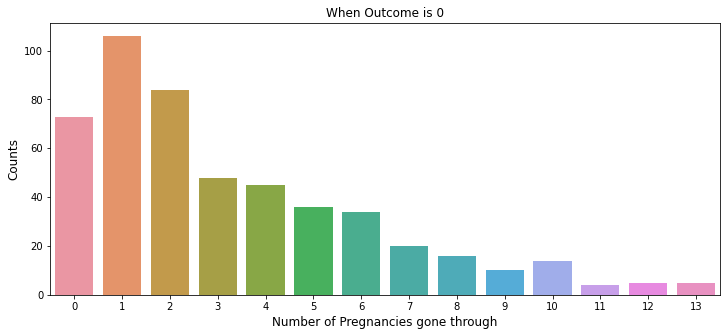

_______________________________________________________________________________________________________________________


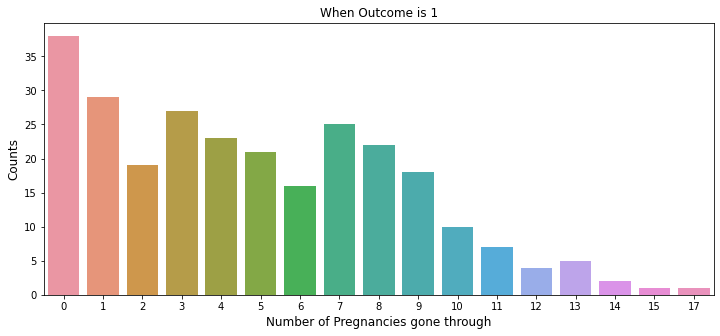

In [16]:
plt.figure(figsize = (12,5))
n = data[data["Outcome"]==0]["Pregnancies"].value_counts()
sns.barplot(x = n.index,y=n.values)
plt.xlabel("Number of Pregnancies gone through",fontsize = 12)
plt.ylabel("Counts",fontsize = 12)
plt.title("When Outcome is 0",fontsize = 12)
plt.show()


print("_______________________________________________________________________________________________________________________")

plt.figure(figsize = (12,5))
p = data[data["Outcome"]==1]["Pregnancies"].value_counts()
sns.barplot(x = p.index,y=p.values)
plt.xlabel("Number of Pregnancies gone through",fontsize = 12)
plt.ylabel("Counts",fontsize = 12)
plt.title("When Outcome is 1",fontsize = 12)
plt.show()

## Observation :- here we can see when outcome is 0 then number of population gone through 1 pregnancy is more 

## Observation :- here we can see when outcome is 1 then number of population gone through 0 pregnancy is more

## That means pregnancy doesn't matter

In [17]:
for i in np.sort(pd.unique(data["Pregnancies"])):
    print("[When Pregnancies = ", i,"]")
    b = data[data["Pregnancies"]==i]["Outcome"].value_counts()
    print(b)
    

[When Pregnancies =  0 ]
0    73
1    38
Name: Outcome, dtype: int64
[When Pregnancies =  1 ]
0    106
1     29
Name: Outcome, dtype: int64
[When Pregnancies =  2 ]
0    84
1    19
Name: Outcome, dtype: int64
[When Pregnancies =  3 ]
0    48
1    27
Name: Outcome, dtype: int64
[When Pregnancies =  4 ]
0    45
1    23
Name: Outcome, dtype: int64
[When Pregnancies =  5 ]
0    36
1    21
Name: Outcome, dtype: int64
[When Pregnancies =  6 ]
0    34
1    16
Name: Outcome, dtype: int64
[When Pregnancies =  7 ]
1    25
0    20
Name: Outcome, dtype: int64
[When Pregnancies =  8 ]
1    22
0    16
Name: Outcome, dtype: int64
[When Pregnancies =  9 ]
1    18
0    10
Name: Outcome, dtype: int64
[When Pregnancies =  10 ]
0    14
1    10
Name: Outcome, dtype: int64
[When Pregnancies =  11 ]
1    7
0    4
Name: Outcome, dtype: int64
[When Pregnancies =  12 ]
0    5
1    4
Name: Outcome, dtype: int64
[When Pregnancies =  13 ]
0    5
1    5
Name: Outcome, dtype: int64
[When Pregnancies =  14 ]
1    2
N

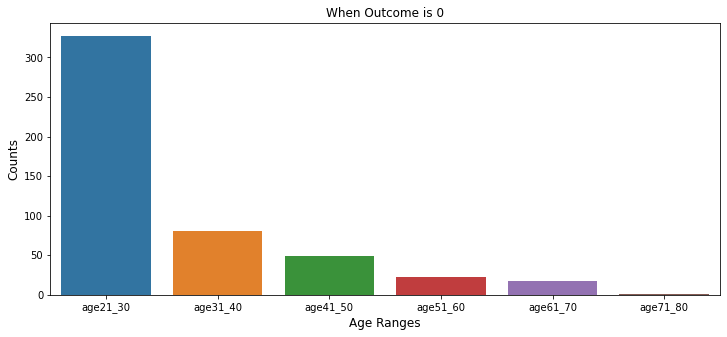

_____________________________________________________________________________________________________________________


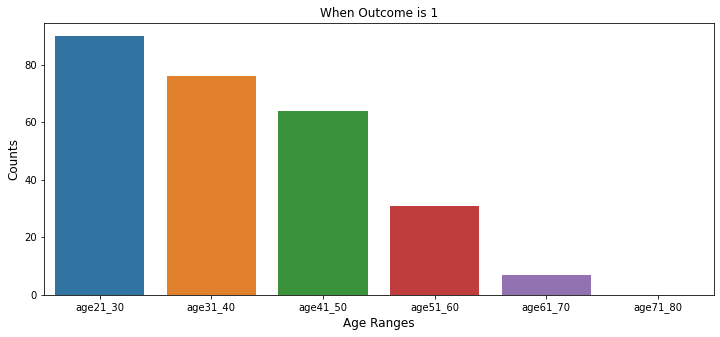

In [18]:
# When outcome is 0
age21_30 = data[data["Outcome"]==0]["Age"][(data["Age"]>=21) & (data["Age"]<=30)]
age31_40 = data[data["Outcome"]==0]["Age"][(data["Age"]>=31) & (data["Age"]<=40)]
age41_50 = data[data["Outcome"]==0]["Age"][(data["Age"]>=41) & (data["Age"]<=50)]
age51_60 = data[data["Outcome"]==0]["Age"][(data["Age"]>=51) & (data["Age"]<=60)]
age61_70 = data[data["Outcome"]==0]["Age"][(data["Age"]>=61) & (data["Age"]<=70)]
age71_80 = data[data["Outcome"]==0]["Age"][(data["Age"]>=71) & (data["Age"]<=80)]

agex = ["age21_30","age31_40","age41_50","age51_60","age61_70","age71_80"]
agey = [len(age21_30),len(age31_40),len(age41_50),len(age51_60),len(age61_70),len(age71_80)]

plt.figure(figsize=(12,5))
sns.barplot(x =agex,y=agey)
plt.xlabel("Age Ranges",fontsize = 12)
plt.ylabel("Counts",fontsize = 12)
plt.title("When Outcome is 0")
plt.show()


print("_____________________________________________________________________________________________________________________")

# When outcome is 1
age21_30 = data[data["Outcome"]==1]["Age"][(data["Age"]>=21) & (data["Age"]<=30)]
age31_40 = data[data["Outcome"]==1]["Age"][(data["Age"]>=31) & (data["Age"]<=40)]
age41_50 = data[data["Outcome"]==1]["Age"][(data["Age"]>=41) & (data["Age"]<=50)]
age51_60 = data[data["Outcome"]==1]["Age"][(data["Age"]>=51) & (data["Age"]<=60)]
age61_70 = data[data["Outcome"]==1]["Age"][(data["Age"]>=61) & (data["Age"]<=70)]
age71_80 = data[data["Outcome"]==1]["Age"][(data["Age"]>=71) & (data["Age"]<=80)]

agexx = ["age21_30","age31_40","age41_50","age51_60","age61_70","age71_80"]
ageyy = [len(age21_30),len(age31_40),len(age41_50),len(age51_60),len(age61_70),len(age71_80)]

plt.figure(figsize=(12,5))
sns.barplot(x =agexx,y=ageyy)
plt.xlabel("Age Ranges",fontsize = 12)
plt.ylabel("Counts",fontsize = 12)
plt.title("When Outcome is 1")
plt.show()

## Observation :- Range of age 31-40 and 41-50 as well as 51-60 is high when outcome is 1 as compare to when outcome is 2 that means age matters.

In [19]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

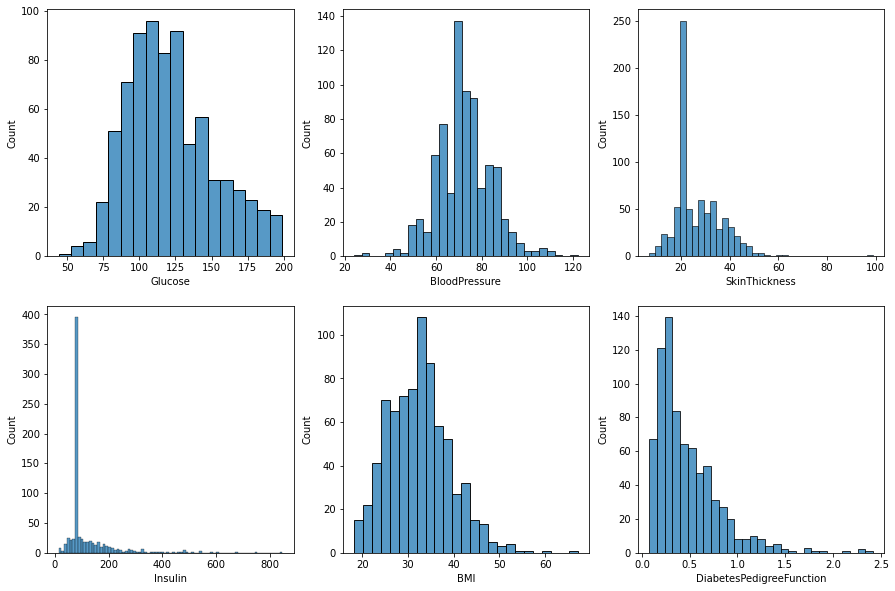

In [20]:
# Checking how data is spread 

plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.histplot(data["Glucose"])
plt.subplot(2,3,2)
sns.histplot(data["BloodPressure"])
plt.subplot(2,3,3)
sns.histplot(data["SkinThickness"])
plt.subplot(2,3,4)
sns.histplot(data["Insulin"])
plt.subplot(2,3,5)
sns.histplot(data["BMI"])
plt.subplot(2,3,6)
sns.histplot(data["DiabetesPedigreeFunction"])
plt.show()

<Figure size 1080x576 with 0 Axes>

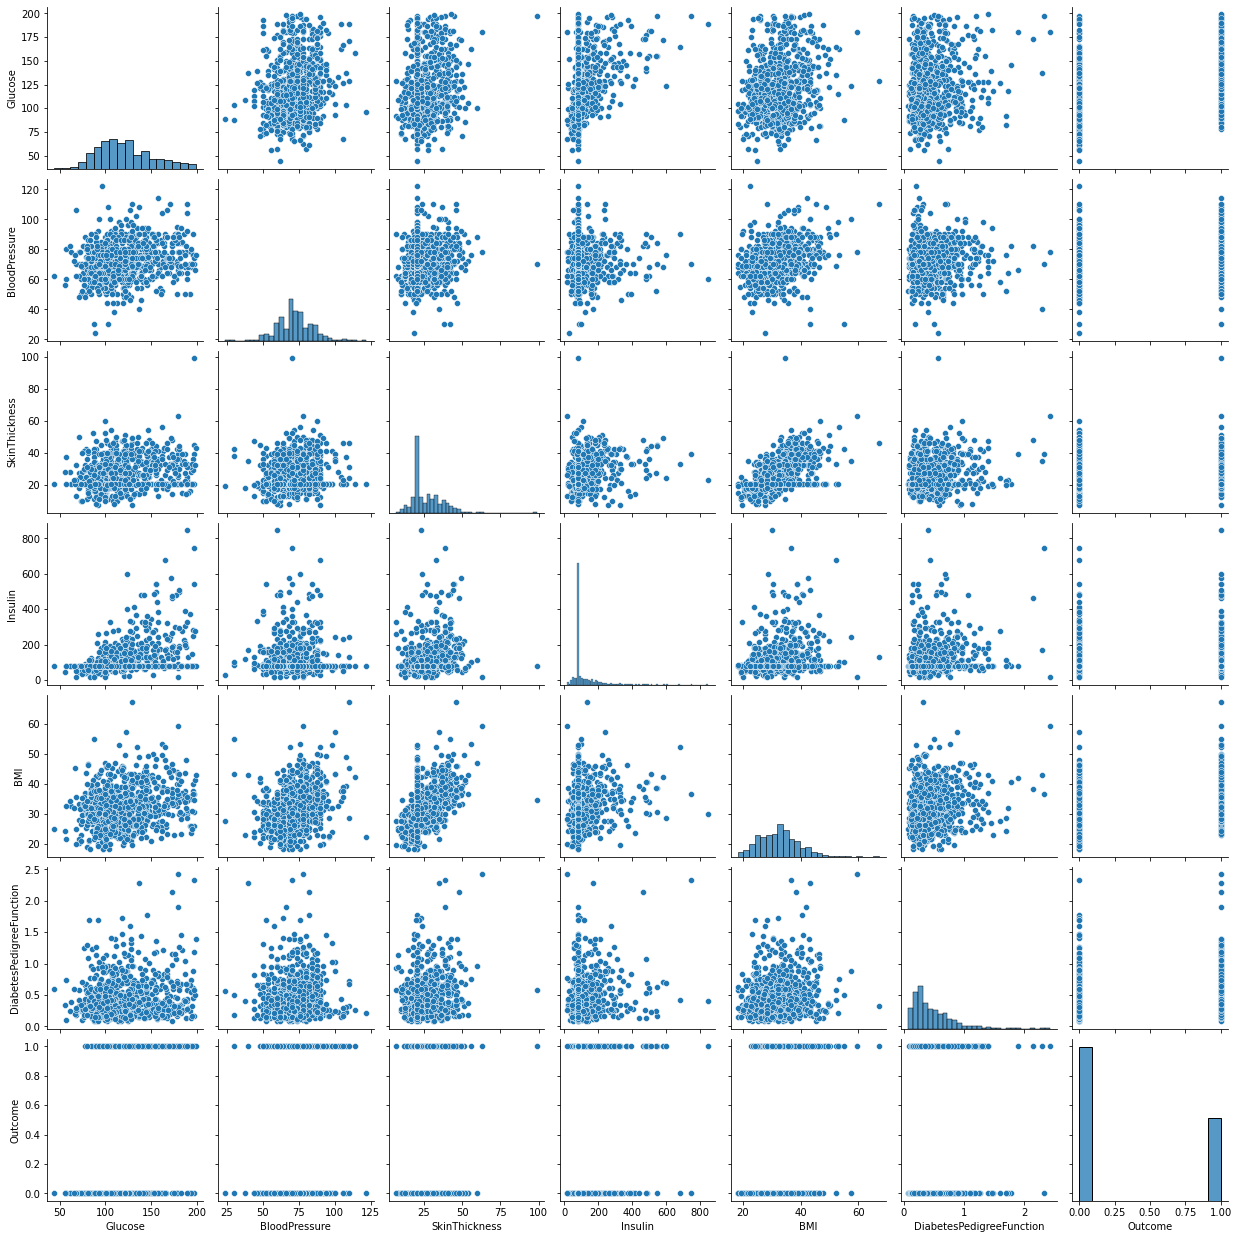

In [21]:
# Checking relation between features
plt.figure(figsize = (15,8))
sns.pairplot(data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Outcome"]])

#  Model Building 

## I am going to use tree based algrorithm here that's why not scaling the features

In [31]:
x = data.iloc[:,0:8].values
y = data.iloc[:,-1].values

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 73)

In [64]:
print("shape of x_train = ",x_train.shape)
print("shape of x_test = ",x_test.shape)
print("shape of y_train = ",y_train.shape)
print("shape of y_test = ",y_test.shape)

shape of x_train =  (614, 8)
shape of x_test =  (154, 8)
shape of y_train =  (614,)
shape of y_test =  (154,)


## Hyper-parameter  tunning of Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {"n_estimators":[50,100,150,200],"criterion":["gini","entropy"],"min_samples_split":[1,2,3,4,5],
              "max_features":["auto", "sqrt", "log2"],"min_samples_leaf":[1,2,3,4,5],"random_state":[33,45]}
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=rf,param_grid = param_grid,cv = 5,n_jobs = -1,return_train_score=True)
gs.fit(x_train,y_train)

C:\Users\sony\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.74428895 0.749167   0.74266293]
  warnings.warn(
C:\Users\sony\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.91774792 0.91489908 0.91937476]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [33, 45]},
             return_train_score=True)

## Checking best parameter

In [68]:
gs.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 33}

In [69]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='auto',min_samples_leaf=1,min_samples_split=2,
                             random_state = 33)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score
print("Accuracy Score = ",accuracy_score(y_test,y_pred))

Accuracy Score =  0.8116883116883117


# Hyper-parameter tunning of Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
param_grid2 = {"criterion":["gini","entropy"],"splitter":["best","random"],"min_samples_split":[1,2,3,4,5],
         "min_samples_leaf":[1,2,3,4,5],"random_state":[22,34,25]}
gs2 = GridSearchCV(estimator=dt,param_grid = param_grid2,cv = 5,n_jobs = -1,return_train_score=True)

gs2.fit(x_train,y_train)
    

C:\Users\sony\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.71163535 0.68723177 0.69212315 0.7100893  0.69209649 0.68716513
 0.70351859 0.67430361 0.69862722 0.67090497 0.70346528 0.69374917
 0.70350526 0.69217646 0.71167533 0.66775956 0.70838331 0.70025323
 0.70836999 0.70678395 0.70840997 0.68087432 0.71326136 0.70345195
        nan        nan        nan        nan        nan        nan
 0.71486072 0.69377582 0.70511795 0.74427562 0.70347861 0.71176863
 0.71486072 0.69377582 0.70511795 0.74427562 0.70347861 0.71176863
 0.71486072 0.69377582 0.70511795 0.74427562 0.70347861 0.71176863
 0.70019992 0.68239371 0.69696122 0.72152472 0.71162202 0.69868053
        nan        nan        nan        nan        nan        nan
 0.68887112 0.71816607 0.68885779 0.7197521  0.70022658 0.70679728
 0.68887112 0.71816607 0.68885779 0.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'random_state': [22, 34, 25],
                         'splitter': ['best', 'random']},
             return_train_score=True)

## Checking best parameter

In [81]:
gs2.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 34,
 'splitter': 'random'}

In [82]:
dt2 = DecisionTreeClassifier(criterion = 'gini',min_samples_leaf=5,min_samples_split=2,random_state = 34,splitter='random')
dt2.fit(x_train,y_train)
y_pred2 = dt2.predict(x_test) 

In [83]:
accuracy_score(y_pred,y_test)

0.8116883116883117

# Accuracy is almost same of both of algorithm